In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 74
1 74
2 74
3 74
4 74
5 74
6 74
7 74
8 74
9 74
10 74
11 74
12 74
13 74
14 74
15 74
16 74
17 74
18 74
19 74
20 74
21 74
22 74
23 74
24 74
25 74
26 74
27 74
28 74
29 74
30 74
31 74
32 74
33 74
34 74
35 74
36 74
37 74
38 74
39 74
40 74
41 74
42 74
43 74
44 74
45 74
46 74
47 74
48 74
49 74
50 74
51 74
52 74
53 74
54 74
55 74
56 74
57 74
58 74
59 74
60 74
61 74
62 74
63 74
64 74
65 74
66 74
67 74
68 74
69 74
70 74
71 74
72 74
73 74
Fetched data for 74 days.


In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
15341,2020-08-26 15:58:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jld23/linearAlgebra.git/master,4e6589791e092fcd5084a0b07df0942a939a752d,success,gesis.mybinder.org,jld23/linearAlgebra,jld23
17173,2020-07-23 20:46:00+00:00,binderhub.jupyter.org/launch,4,GitHub,datakurre/robotkernel/master,55ef347ee71ef8c5c23d3c15cf296e16443b3994,success,gke.mybinder.org,datakurre/robotkernel,datakurre
12509,2020-08-22 20:02:00+00:00,binderhub.jupyter.org/launch,4,GitHub,alankost/Photonic-Integrated-Circuits/master,2214e7e5a0fe57fcd60df2903487765288e67e93,success,gke.mybinder.org,alankost/Photonic-Integrated-Circuits,alankost
12962,2020-07-30 14:51:00+00:00,binderhub.jupyter.org/launch,4,GitHub,fonsp/vscode-binder/master,08c6552663088e72478234c6758659df3bffb1ab,success,gke.mybinder.org,fonsp/vscode-binder,fonsp
6106,2020-08-04 07:19:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
1409,2020-09-11 01:58:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/master,6a5d1bed156546125975a2e38a2b2e60b4a12f6d,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
21004,2020-08-24 23:03:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
769,2020-08-03 01:44:00+00:00,binderhub.jupyter.org/launch,4,GitHub,dask/dask-examples/master,e19db3d57bd8d2d1fc91ada40721f9d111b83de2,success,gke.mybinder.org,dask/dask-examples,dask
10261,2020-07-05 17:51:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
908,2020-08-31 01:49:00+00:00,binderhub.jupyter.org/launch,4,GitHub,atlas-outreach-data-tools/notebooks-collection...,e728ef8edd2f4b1834dccf15334f1da454343fb2,success,gesis.mybinder.org,atlas-outreach-data-tools/notebooks-collection...,atlas-outreach-data-tools


In [21]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [22]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
4541,2020-08-13 06:54:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
2834,2020-09-05 04:49:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
2083,2020-07-24 03:45:00+00:00,GitHub,success,gke.mybinder.org,mth229/229-projects,mth229
13731,2020-07-10 17:13:00+00:00,GitHub,success,gke.mybinder.org,SamLau95/nbinteract,SamLau95
13346,2020-07-08 15:16:00+00:00,GitHub,success,gke.mybinder.org,materialsvirtuallab/matgenb,materialsvirtuallab
13242,2020-08-17 13:35:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
22037,2020-09-01 21:51:00+00:00,GitHub,success,gke.mybinder.org,binder-examples/requirements,binder-examples
4380,2020-07-05 09:19:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
1018,2020-07-15 01:53:00+00:00,GitHub,success,ovh.mybinder.org,GLAM-Workbench/trove-newspapers,GLAM-Workbench
6178,2020-08-17 07:27:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab


In [23]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [24]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [25]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/envs/desihigh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
24213,2020-09-11 21:48:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-11 21:48:00+00:00
24565,2020-09-11 22:21:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-11 22:21:00+00:00
24568,2020-09-11 22:22:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-11 22:22:00+00:00
25119,2020-09-11 23:16:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-11 23:16:00+00:00


In [27]:
daily = ds.set_index("timestamp").resample('D').count()

In [28]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [29]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-09-08 00:00:00+00:00,1,1,1,1,1,1
2020-09-09 00:00:00+00:00,5,5,5,5,5,5
2020-09-10 00:00:00+00:00,14,14,14,14,14,14
2020-09-11 00:00:00+00:00,16,16,16,16,16,16
2020-09-12 00:00:00+00:00,1,1,1,1,1,1


Text(0.5, 0, '')

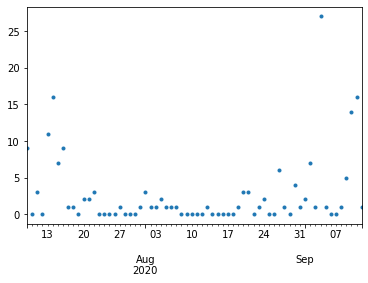

In [30]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [31]:
np.sum(daily['repo'])

174